# Raspberry ánalisis de datos 


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.dates as mdates
from datetime import datetime 

# Código Raspberry/codigodeprueba.py

```python

from datetime import datetime
import numpy as np
import os
import time
from sense_hat import SenseHat
sense=SenseHat()
while 1:
  namefile=datetime.now().strftime("%Y-%m-%d")+".csv"
  if not os.path.exist("/home/computo/Desktop/Datos_SenseHat/"+namefile):
  f=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"w")
  f.write(Datetime,Humedad,Tempertura,Presion/r/n")
  f.close()else:
  d=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"a")
  d.write(datetime.now().strftime("%Y-%m-%d-%H:%M:%S"))
  humidity=sense.get_humidity()
  temp=sense.get_temperature()
  pressure=sense.get_pressure()
  d.write(",{:.2f},{:.2f},{:.2f}/r/n.format(humidity,temp,pressure))
  d.close()
  print ("OK")
  message="T:"+str(temp+"P:"+str(pressure)+"H:"+str(humidity)
  sense.show_message(message,scroll_speed=0.10)
  time.sleep(1800)

In [56]:
listfile=glob.glob("2023*.csv")
#para que lea todos archivos con terminación "2023*.csv" 

In [57]:
listfile.sort()
#para ordenar y que acomode los datos, nombres de los archivos 

In [58]:
data=[] #crear una lista vacía para almacenar los Dataframes 
for files in listfile:
    data.append (pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)


In [60]:
tiempo=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S") 
#reconociendo variable tiempo como código y no stream 

In [61]:
datafull["Presion"].replace(0, np.nan,inplace=True) #remplazo los 0 por nan 

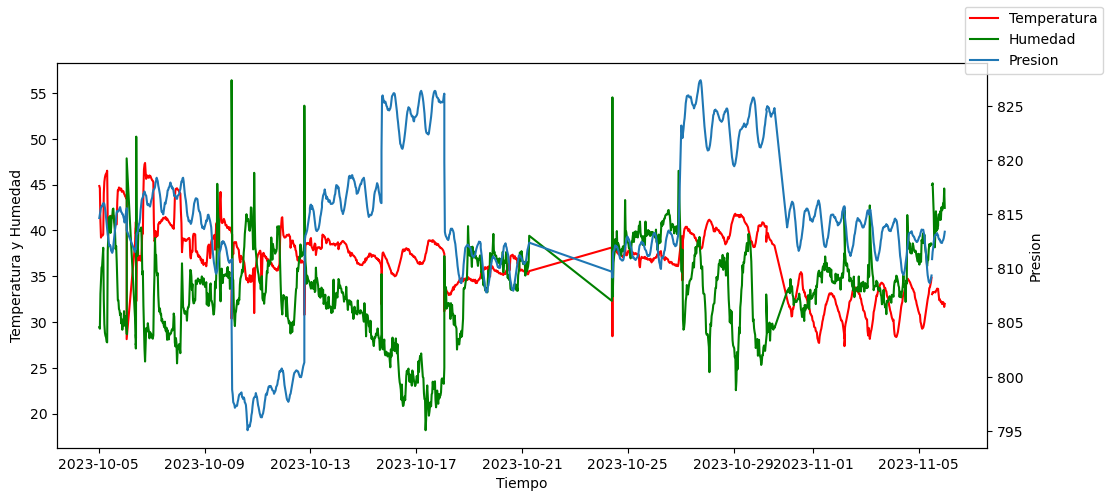

In [64]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura y Humedad")
ax1.plot(tiempo, datafull[" Temperatura"], label="Temperatura", color="r")
ax1.plot(tiempo, datafull["Humedad"], label="Humedad", color="g")
ax2=ax1.twinx()
ax2.set_ylabel("Presion")
ax2.plot(tiempo, datafull ["Presion"],label="Presion")
datafull["Presion"].interpolate(method='polynomial', order=2, inplace=True)
datafull["Humedad"].interpolate(method='polynomial', order=2, inplace=True)
datafull[" Temperatura"].interpolate(method='polynomial', order=2, inplace=True)
fig.legend()

In [28]:
datafull

,Datetime,Humedad,Temperatura,Presion
0,2023-10-05 00:28:52,29.43,44.84,814.65
1,2023-10-05 00:59:28,29.26,44.61,814.96
2,2023-10-05 01:30:04,33.06,41.00,815.33
3,2023-10-05 02:00:40,34.41,39.21,815.64
4,2023-10-05 02:31:15,35.92,39.44,815.73
...,...,...,...,...
1349,2023-11-05 21:30:02,42.29,32.06,812.55
1350,2023-11-05 22:00:02,42.96,32.17,812.60
1351,2023-11-05 22:30:01,42.81,32.04,812.76
1352,2023-11-05 23:00:02,44.57,31.64,813.03


In [29]:
#type(datafull["Presion"][0]) 
j=0
for i in datafull["Presion"]:
   # print (i)
    if np.isnan(i):
        j+=1
print(j)

0


In [65]:
Val=datafull["Presion"].mean()
datafull["Presion"].fillna(value=Val, inplace=True)

In [73]:
datafull

,Datetime,Humedad,Temperatura,Presion
0,2023-10-05 00:28:52,29.43,44.84,814.65
1,2023-10-05 00:59:28,29.26,44.61,814.96
2,2023-10-05 01:30:04,33.06,41.00,815.33
3,2023-10-05 02:00:40,34.41,39.21,815.64
4,2023-10-05 02:31:15,35.92,39.44,815.73
...,...,...,...,...
1349,2023-11-05 21:30:02,42.29,32.06,812.55
1350,2023-11-05 22:00:02,42.96,32.17,812.60
1351,2023-11-05 22:30:01,42.81,32.04,812.76
1352,2023-11-05 23:00:02,44.57,31.64,813.03


In [66]:
prom=datafull["Presion"].mean()
for i,row in datafull.iterrows():
    if np.isnan(row["Presion"]):
     print(datafull["Presion"][i])
        #datafull(["Presion"][i])
        # print(row["Presion"])

In [67]:
datafull["Presion"].interpolate(method='polynomial', order=2, inplace=True)

In [68]:
prom 

814.2277352685607

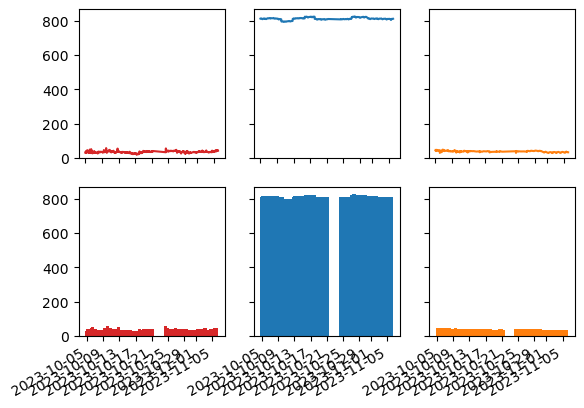

In [85]:
fig, ax = plt.subplots(2,3, sharey = True)
ax[0, 0].plot(tiempo,datafull['Humedad'], color = 'tab:red')
ax[0, 1].plot(tiempo,datafull['Presion'], color = 'tab:blue')
ax[0, 2].plot(tiempo,datafull[" Temperatura"], color="tab:orange")
ax[1, 0].bar(tiempo,datafull['Humedad'],color = 'tab:red')
ax[1, 1].bar(tiempo,datafull['Presion'], color = 'tab:blue')
ax[1, 2].bar(tiempo,datafull[" Temperatura"], color="tab:orange")
fig.autofmt_xdate()
plt.show()